In [1]:

import sys
import os
sys.path.append(os.path.abspath('..'))
from tools.component_tools import GLC,GLC_Gas,Fluid
import numpy as np 
R_const=8.314
T = [673, 673, 673, 673, 713, 713, 713, 713, 713]
Z = 0.6
R = 0.0547/2
Q_l = [
    71.0    * 1e-3 / 3600,
    66      * 1e-3 / 3600,
    69      * 1e-3 / 3600,
    100     * 1e-3 / 3600,
    61      * 1e-3 / 3600,
    68      * 1e-3 / 3600,
    68      * 1e-3 / 3600,
    100     * 1e-3 / 3600,
    70      * 1e-3 / 3600,
]
Q_gas = [
    3 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    9 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    3 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    9 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
]
p_in = [1085, 1003, 927, 1188, 1258, 1152, 1158, 1228, 2490]
p_out = [653, 613, 557, 858, 682, 670, 612, 712, 1215]
B_vec = []
kl_vec = []
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=0,p_tot=1.5E5)
    
    Flibe=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=True )
    c_in=p_in[i]*Flibe.Solubility
    print(c_in)
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]*Flibe.Solubility,fluid=Flibe,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]*Flibe.Solubility)
    [a,b] = Melodie.get_kla_from_cout()
    print(a, b)
    B_vec.append(a)
    kl_vec.append(b)
    eff=0.4
    print("c_out is ",Melodie.c_out)    
    Melodie.update_attribute("c_out",Melodie.c_in*(1-eff))
    print("c_out is ",Melodie.c_out)
    height=Melodie.get_z_from_eff()
    print("height is ",height)


0.11336992421308277
integral is (-0.8616400985618486, None)
30.212997495461888 -0.012052189879554939
c_out is  0.06823093134667563
c_out is  0.06802195452784966
height is  0.5792005013223048
0.10480187464121846
integral is (42.77407390838246, None)
28.085321615499783 0.5561683437602218
c_out is  0.06405139497015644
c_out is  0.06288112478473107
height is  0
0.09686075552583201
integral is (4.365707023058569, None)
29.361927143477047 0.05934517200963508
c_out is  0.05820004404302959
c_out is  0.0581164533154992
height is  0.6557235622623794
0.12413223038261967
integral is (-9.797334121591579, None)
42.5535175992421 -0.1930143657262974
c_out is  0.08965105527633643
c_out is  0.0744793382295718
height is  0
0.13323772780029136
integral is (-0.7210592349294696, None)
25.957645735537678 -0.008665277858628244
c_out is  0.07223221809204984
c_out is  0.07994263668017482
height is  3.7323327235179637
0.12201101941648303
integral is (-0.8615387590282985, None)
28.936391967484624 -0.0115415848270

if done correctly the results should be the same as this table
| B         | kla$$10^3$$    |
|-----------|----------------|
| 30.2      | 4.87           |
| 28.0      | 3.92           |
| 29.4      | 4.13           |
| 42.6      | 3.88           |
| 26.0      | 5.06           |
| 28.9      | 4.50           |
| 28.9      | 5.16           |
| 42.6      | 6.99           |
| 29.8      | 6.12           |
| 28.2      | 2.84           |
| 14.1      | 2.12           |
| 14.1      | 1.90           |
| 14.1      | 1.66           |
| 14.1      | 1.73           |



height is  0.2888840668133615
eff_res is  0.09999830058493475
err is  -1.6994150652538398e-06
height is  0.34070701683059196
eff_res is  0.11110898365135612
err is  -2.127459755002503e-06
height is  0.4002188894829455
eff_res is  0.12221957062506927
err is  -2.6515971529583737e-06
height is  0.4698272768171663
eff_res is  0.1333300464722301
err is  -3.2868611032355055e-06
height is  0.553270130338745
eff_res is  0.14444012222895158
err is  -4.322215492874593e-06
height is  0.656818189599879
eff_res is  0.1555495175130587
err is  -6.0380424968531354e-06
height is  0.7922287708519705
eff_res is  0.16665550787174804
err is  -1.1158794918642023e-05
height is  0.9857134892010625
eff_res is  0.17774214642285927
err is  -3.563135491851943e-05
height is  1.3167137361854495
eff_res is  0.18869528855442197
err is  -0.0001936003344669146
height is  2.2840731157687637
eff_res is  0.198234861438121
err is  -0.001765138561879015
height is  0.11943559093910948
eff_res is  0.09999922856024547
err is  

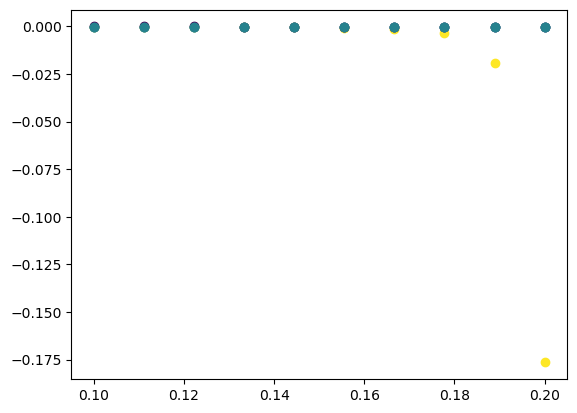

In [2]:
# reset notebook
%reset -f
from math import e, nan
from pyexpat import model

from sympy import Q
from tools.component_tools import GLC,GLC_Gas,Fluid
import numpy as np 
import matplotlib.pyplot as plt
import mph 
R_const=8.31
T = [673, 673, 673, 673, 673]
Z = 0.8
R = 0.03
Q_l = np.array([
    80.0 * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
])
Q_gas = np.array([
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    30 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
])
L_on_g=Q_l/Q_gas
p_in = [1275, 1050, 988, 463, 225]
p_out = [796, 515, 484, 267, 130]
B_vec = []
kl_vec = []
client=mph.start()
model = client.load('GenericMSGLC.mph')
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=0,p_tot=1.5E5)
    Flibe=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=True )
    c_in=p_in[i]*Flibe.Solubility
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]*Flibe.Solubility,fluid=Flibe,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]*Flibe.Solubility,kla=4E-3)
    # [a,b] = Melodie.get_kla_from_cout()
    # print(a, b)
    # B_vec.append(a)
    # kl_vec.append(b)
    eff_v=np.linspace(0.1,0.2,10)
    # eff_v=np.array([1-Melodie.c_out/Melodie.c_in])
    height_v=[]
    err_v=[]
    norm = plt.Normalize(min(Q_l/Q_gas), max(Q_l/Q_gas))
    # Melodie.kla=1E-4
    for eff in eff_v:
        Melodie.c_out=Melodie.c_in*(1-eff)
        # Melodie.GLC_gas.update_attribute("p_out",Melodie.c_out/Flibe.Solubility)
        height=Melodie.get_z_from_eff()
        print("height is ",height)
        c_PbLi=56182
        height_v.append(height)
        flag_coms=1
        if isinstance(height,float) and flag_coms!=0:
            # model.parameter("H",height)
            model.parameter("H",height)
            model.parameter("Ls",Q_l[i]*c_PbLi)
            model.parameter("Vs",Q_gas[i])
            model.parameter("R",R)
            model.parameter("K_H",Melodie.fluid.Solubility)
            model.parameter("Kl_a",Melodie.kla)
            model.parameter("c2_in",1E-10)
            model.parameter("c_in",c_in)
            model.save()
            model.solve()
            eff_coms=model.evaluate("eff")
            eff_res=eff_coms
            err=eff_res-eff
            print("eff_res is ",eff_res)
            print("err is ",err)    
            err_v.append(err)
            plt.scatter( eff,err*100, c=Q_l[i]/Q_gas[i], cmap='viridis', norm=norm)
        

height is  0.31912343525789433
eff_res is  0.09999454426725415
err is  -5.455732745851538e-06
height is  0.45003660026340386
eff_res is  0.12221492718652731
err is  -7.295035694923624e-06
height is  0.6413990241775516
eff_res is  0.1444340916711054
err is  -1.0352773339022958e-05
height is  0.9854327086906677
eff_res is  0.16662739358724293
err is  -3.927307942372393e-05
height is  2.632238997412854
eff_res is  0.18657755375222607
err is  -0.0023113351366628176
height is  1.3365660567610533
eff_res is  0.17732531817533964
err is  -0.03378579293577147
height is  0
height is  0
height is  1.1043849179916034
eff_res is  0.17116998472995662
err is  -0.10660779304782117
height is  4.451884765325317
eff_res is  0.18726120368891508
err is  -0.11273879631108491
height is  0.12703266996266122
eff_res is  0.09999638976195684
err is  -3.6102380431696224e-06
height is  0.16380215689234714
eff_res is  0.1222175782015006
err is  -4.644020721630837e-06
height is  0.20497992244959623
eff_res is  0.144

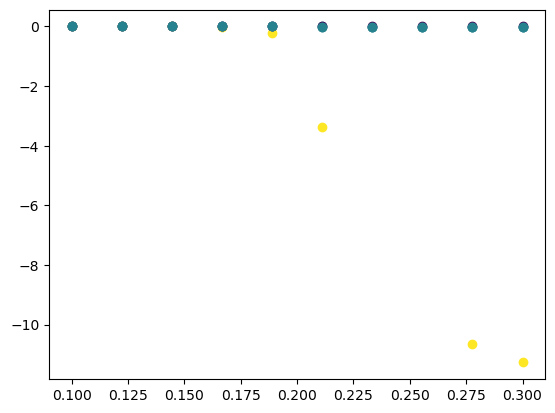

In [3]:
# reset notebook
%reset -f
from math import e, nan
from pyexpat import model

from sympy import Q
from tools.component_tools import GLC,GLC_Gas,Fluid
import numpy as np 
import matplotlib.pyplot as plt
import mph 
R_const=8.31
T = [673, 673, 673, 673, 673]
Z = 0.8
R = 0.03
Q_l = np.array([
    80.0 * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
])
Q_gas = np.array([
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    30 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
])
L_on_g=Q_l/Q_gas
p_in = [1275, 1050, 988, 463, 225]
p_out = [796, 515, 484, 267, 130]
B_vec = []
kl_vec = []
client=mph.start()
model = client.load('GenericMSGLC.mph')
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=0,p_tot=1.5E5)
    Flibe=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=True )
    c_in=p_in[i]*Flibe.Solubility
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]*Flibe.Solubility,fluid=Flibe,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]*Flibe.Solubility,kla=4E-3)
    # [a,b] = Melodie.get_kla_from_cout()
    # print(a, b)
    # B_vec.append(a)
    # kl_vec.append(b)
    eff_v=np.linspace(0.1,0.3,10)
    # eff_v=np.array([1-Melodie.c_out/Melodie.c_in])
    height_v=[]
    err_v=[]
    norm = plt.Normalize(min(Q_l/Q_gas), max(Q_l/Q_gas))
    # Melodie.kla=1E-4
    for eff in eff_v:
        Melodie.c_out=Melodie.c_in*(1-eff)
        Melodie.GLC_gas.update_attribute("pg_in",p_out[i]/10)
        # Melodie.GLC_gas.update_attribute("p_out",Melodie.c_out/Flibe.Solubility)
        height=Melodie.get_z_from_eff()
        print("height is ",height)
        c_PbLi=56182
        height_v.append(height)
        flag_coms=1
        if isinstance(height,float) and flag_coms!=0:
            # model.parameter("H",height)
            model.parameter("H",height)
            model.parameter("Ls",Q_l[i]*c_PbLi)
            model.parameter("Vs",Q_gas[i])
            model.parameter("R",R)
            model.parameter("K_H",Melodie.fluid.Solubility)
            model.parameter("c2_in",Melodie.GLC_gas.pg_in/R_const/T[i])
            model.parameter("Kl_a",Melodie.kla)
            model.parameter("c_in",c_in)
            # model.save()
            model.solve()
            eff_coms=model.evaluate("eff")
            eff_res=eff_coms
            err=eff_res-eff
            print("eff_res is ",eff_res)
            print("err is ",err)    
            err_v.append(err)
            plt.scatter( eff,err*100, c=Q_l[i]/Q_gas[i], cmap='viridis', norm=norm)
        

In [ ]:


Melodie.GLC_gas.inspect()
# model.save()


G_gas: 1.6666666666666667e-06
pg_in: 13.0
p_tot: 150000.0
pg_out: 0


java.io.IOException: java.io.IOException: Failed to save model. The file 'GenericMSGLC.mph' is locked by another model.

In [4]:
Melodie.inspect()

c_in: 0.023507161926676547
eff: None
fluid is a <class 'tools.component_tools.Fluid'> class, printing its variables:
    T: None
    MS: True
    D: None
    Solubility: 0.00010447627522967355
    k_t: None
    d_Hyd: None
    mu: None
    rho: None
    recirculation: 0
    U0: None
    k: None
    cp: None
    inv: None
H: 0.8
R: 0.03
L: None
G_L: 1.1111111111111112e-05
T: 673
GLC_gas: <tools.component_tools.GLC_Gas object at 0x000001B700024690>
c_out: 0.01645501334867358
kla: 0.004
